#Import Libraries

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets , transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [5]:
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,),(0.3081,)) #how do we get this normalizartion values ;)
])

test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,),(0.3081,))  #how do we get this normalizartion values ;)
])

# Dataset and Creating Train/Test Split

In [6]:
train = datasets.MNIST(root = '/content',train=True,download=True,transform=train_transforms)
test = datasets.MNIST(root = '/content',train=False,download=True,transform=train_transforms)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [7]:
!nvidia-smi

Mon Jun  7 17:28:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    903MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
SEED = 1
# Cuda ?
cuda = torch.cuda.is_available()
print("Cuda Available?", cuda)

# For reproduciability (cpu)
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED) # For reproduciability (gpu)

dataloader_args = dict(shuffle=True,batch_size=128,num_workers=4, pin_memory=True)

# train dataloader
train_loader = torch.utils.data.DataLoader(train,**dataloader_args)
test_loader = torch.utils.data.DataLoader(test,**dataloader_args)

Cuda Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: torch.Size([28, 60000, 28])
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])


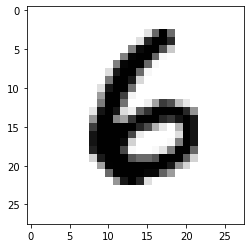

In [9]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train_data.shape)
print(' - Tensor Shape:', train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

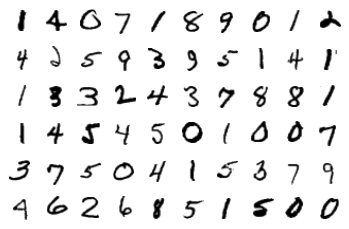

In [10]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [11]:
# simple transform without Normalization
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: torch.Size([60000, 28, 28])
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)




*   mean: tensor(0.1307)
*   std: tensor(0.3081)

Normalize the DS with this values.


# The model
will be creating a solid basic model taking care of all the fundemantals like receptive field and kernas size and output size 

Not getting bother much about the parameters as of now!

Focus is to create a basic solid fou8ndationn model on which later stage can add fancy stuff to reduce the paramaters and get crazy acc.

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()   #input size (1,28,28)
        #INPUT BLOCK
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size=(3,3),padding=0,bias=False),
            nn.ReLU()
        )   #output_size= (32,26,26) --> Global receptive_field = 3
        
        ##### CONV BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),padding=0,bias=False),
            nn.ReLU()
        )   #output_size= (64,24,24) --> Global receptive_field = 5
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),padding=0,bias=False),
            nn.ReLU()
        )   #output_size= (128,22,22) --> Global receptive_field = 7

        ##### TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2,2) #output_size(128,11,11) --> Global receptive_field = 7
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=32,kernel_size=(1,1),padding=0,bias=False),
            nn.ReLU()
        )   #output_size= (32,11,11) --> Global receptive_field = 7

        ##### CONV BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),padding=0,bias=False),
            nn.ReLU()
        )   #output_size= (64,9,9) --> Global receptive_field = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),padding=0,bias=False),
            nn.ReLU()
        )   #output_size= (128,7,7) --> Global receptive_field = 11

        ##### OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=10,kernel_size=(1,1),padding=0,bias=False),
            nn.ReLU()
        )   #output_size= (10,7,7) --> Global receptive_field = 11
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=10,kernel_size=(7,7),padding=0,bias=False),
            #nn.ReLU()  NEVER IN LAST LAYER!!
        )   #output_size= (10,1,1) --> Global receptive_field = 16 - ? NOT SURE



    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer :((, so we have to take external help

In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
         MaxPool2d-7          [-1, 128, 11, 11]               0
            Conv2d-8           [-1, 32, 11, 11]           4,096
              ReLU-9           [-1, 32, 11, 11]               0
           Conv2d-10             [-1, 64, 9, 9]          18,432
             ReLU-11             [-1, 64, 9, 9]               0
           Conv2d-12            [-1, 128, 7, 7]          73,728
             ReLU-13            [-1, 128, 7, 7]               0
           Conv2d-14             [

In [14]:
!nvidia-smi

Mon Jun  7 17:29:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    903MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments. 

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [15]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model,device,train_loader,optimizer,epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx,(data,target) in enumerate(pbar):
    #get samples
    data,target = data.to(device),target.to(device)

    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # predict
    y_pred = model(data)
 
    # Calculate Loss
    loss = F.nll_loss(y_pred,target)
    train_losses.append(loss)   #appending to train loss

    #backprop
    loss.backward()
    optimizer.step()

    #update pbar-tqdm
    pred = y_pred.argmax(dim=1,keepdim=True) # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))


In [16]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
  print("Epoch: ", epoch)
  train(model,device,train_loader,optimizer,epoch)
  test(model,device,test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch:  0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.2806732952594757 Batch_id=468 Accuracy=69.92: 100%|██████████| 469/469 [00:10<00:00, 45.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1215, Accuracy: 9631/10000 (96.31%)

Epoch:  1


Loss=0.03418209031224251 Batch_id=468 Accuracy=96.88: 100%|██████████| 469/469 [00:10<00:00, 46.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0696, Accuracy: 9781/10000 (97.81%)

Epoch:  2


Loss=0.017215212807059288 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:10<00:00, 45.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0520, Accuracy: 9828/10000 (98.28%)

Epoch:  3


Loss=0.05546041950583458 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:10<00:00, 46.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0518, Accuracy: 9841/10000 (98.41%)

Epoch:  4


Loss=0.022758154198527336 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:10<00:00, 46.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0446, Accuracy: 9864/10000 (98.64%)

Epoch:  5


Loss=0.022089028730988503 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:10<00:00, 46.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0467, Accuracy: 9848/10000 (98.48%)

Epoch:  6


Loss=0.04043659567832947 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:10<00:00, 45.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0554, Accuracy: 9836/10000 (98.36%)

Epoch:  7


Loss=0.003397081047296524 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:10<00:00, 45.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0450, Accuracy: 9862/10000 (98.62%)

Epoch:  8


Loss=0.05925476923584938 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:10<00:00, 45.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0395, Accuracy: 9878/10000 (98.78%)

Epoch:  9


Loss=0.04331197962164879 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:10<00:00, 45.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0425, Accuracy: 9872/10000 (98.72%)

Epoch:  10


Loss=0.03230223432183266 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:10<00:00, 45.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0411, Accuracy: 9867/10000 (98.67%)

Epoch:  11


Loss=0.06287593394517899 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:10<00:00, 44.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0490, Accuracy: 9854/10000 (98.54%)

Epoch:  12


Loss=0.05593493953347206 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:10<00:00, 44.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0467, Accuracy: 9863/10000 (98.63%)

Epoch:  13


Loss=0.021152770146727562 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:10<00:00, 44.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0510, Accuracy: 9863/10000 (98.63%)

Epoch:  14


Loss=0.014266959391534328 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:10<00:00, 46.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0470, Accuracy: 9873/10000 (98.73%)

Epoch:  15


Loss=0.0061077699065208435 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:09<00:00, 46.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0457, Accuracy: 9873/10000 (98.73%)

Epoch:  16


Loss=0.024877553805708885 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:10<00:00, 45.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0456, Accuracy: 9870/10000 (98.70%)

Epoch:  17


Loss=0.0003072266117669642 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:10<00:00, 45.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0503, Accuracy: 9866/10000 (98.66%)

Epoch:  18


Loss=0.018421756103634834 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:10<00:00, 46.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0475, Accuracy: 9884/10000 (98.84%)

Epoch:  19


Loss=0.03550069406628609 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:09<00:00, 47.07it/s]



Test set: Average loss: 0.0437, Accuracy: 9879/10000 (98.79%)



Text(0.5, 1.0, 'Test Accuracy')

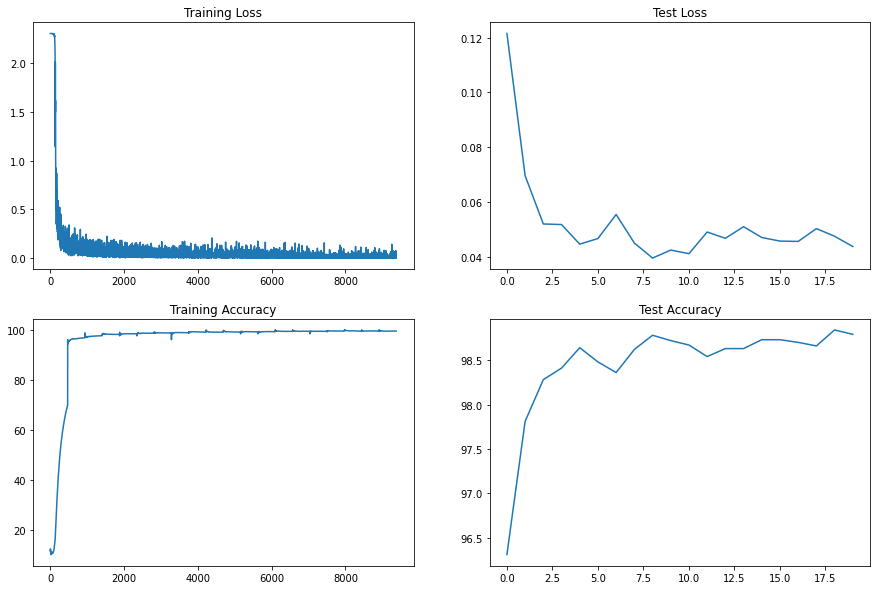

In [17]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")